# Housing prices prediction

This model uses the dataset taken from the Kaggle competition, and is a simple linear regression with regularization model. The
information regarding each feature of dataset can be found in the "data_description.txt" file. The "train.csv" file will be used, split into a training and test set.

In [207]:
#import relevant libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
print("Here are the first five training examples printed out:")
print(data.head())
print("The dimensions of this dataset are:", data.shape)

Here are the first five training examples printed out:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  Sal

In [208]:
#As seen above, it is observed that not all the data is numerical, it is key-based.
#Thus, we need to convert the keys to a corresponding numerical value. Each key will be assigned
#its corresponding value based on it's occurence, for example, RL in MSZoning comes first, hence
#it will carry the value 1.
for (columnName, columnData) in data.iteritems():
    print(columnName, "y/n for amending:")
    string = input()
    if(string=="y"):
        count = 1
        dictionary = {}
        for i in range(1460):
            if(dictionary.get(columnData[i])==None):
                dictionary[columnData[i]] = count
                count += 1
            else: continue
        data[columnName] = data[columnName].replace(dictionary)

Id y/n for amending:
n
MSSubClass y/n for amending:
n
MSZoning y/n for amending:
y
LotFrontage y/n for amending:
n
LotArea y/n for amending:
n
Street y/n for amending:
y
Alley y/n for amending:
y
LotShape y/n for amending:
y
LandContour y/n for amending:
y
Utilities y/n for amending:
y
LotConfig y/n for amending:
y
LandSlope y/n for amending:
y
Neighborhood y/n for amending:
y
Condition1 y/n for amending:
y
Condition2 y/n for amending:
y
BldgType y/n for amending:
y
HouseStyle y/n for amending:
y
OverallQual y/n for amending:
n
OverallCond y/n for amending:
n
YearBuilt y/n for amending:
n
YearRemodAdd y/n for amending:
n
RoofStyle y/n for amending:
y
RoofMatl y/n for amending:
y
Exterior1st y/n for amending:
y
Exterior2nd y/n for amending:
y
MasVnrType y/n for amending:
y
MasVnrArea y/n for amending:
n
ExterQual y/n for amending:
y
ExterCond y/n for amending:
y
Foundation y/n for amending:
y
BsmtQual y/n for amending:
y
BsmtCond y/n for amending:
y
BsmtExposure y/n for amending:
y
Bsmt

In [209]:
del data['Id'] #deleting the internal index for the training examples
data_copy = data.dropna() #dropping any NaN values that will cause trouble.
print("Checking for any NaN values:", data_copy.isnull().values.any())
print("The amended dimensions are:", data_copy.shape)

Checking for any NaN values: False
The amended dimensions are: (1121, 80)


In [233]:
#Splitting to training set and test set, with 80%-20% configuration
train = data_copy[:896]
xtrain = train
ytrain = np.array(xtrain['SalePrice']).reshape(896, 1)
del xtrain['SalePrice']
print("The dimensions for training set for features and for price are:", xtrain.shape, ytrain.shape)
test = data_copy[896:]
xtest = test
ytest = np.array(xtest['SalePrice']).reshape(225, 1)
del xtest['SalePrice']
print("The dimensions for training set for features and for price are:", xtest.shape, ytest.shape)

The dimensions for training set for features and for price are: (896, 79) (896, 1)
The dimensions for training set for features and for price are: (225, 79) (225, 1)


In [271]:
#Adding a column of ones
X0train = np.ones(len(xtrain)).reshape(896, 1)
Xtrain = np.append(X0train, xtrain, axis=1).reshape(896, 80)
Xtrain = np.append(Xtrain, (xtrain**2), axis=1).reshape(896, 159)
Xtrain = np.append(Xtrain, (xtrain**3), axis=1).reshape(896, 238)
Xtrain = np.append(Xtrain, (xtrain**4), axis=1).reshape(896, 317)
Xtrain = np.append(Xtrain, (xtrain**5), axis=1).reshape(896, 396)
Xtrain = np.append(Xtrain, (xtrain**6), axis=1).reshape(896, 475)
#Xtrain = np.append(Xtrain, (xtrain**7), axis=1).reshape(896, 554)
#Xtrain = np.append(Xtrain, (xtrain**8), axis=1).reshape(896, 633)
print("The dimensions for the feature set after appending with vector of ones:", Xtrain.shape)

The dimensions for the feature set after appending with vector of ones: (896, 475)


In [272]:
#Since all features are differently scaled, we will scale the features through their mean
#which maps each value between the range 0 and 1.
for i in range(475): Xtrain[:, i] /= np.max(Xtrain, axis=0)[i]
print("Showing the amended array: ", Xtrain)

Showing the amended array:  [[1.00000000e+00 3.15789474e-01 2.00000000e-01 ... 1.05007365e+00
  3.81469727e-06 2.14334705e-05]
 [1.00000000e+00 1.05263158e-01 2.00000000e-01 ... 1.07501714e+00
  3.81469727e-06 2.14334705e-05]
 [1.00000000e+00 3.15789474e-01 2.00000000e-01 ... 1.05007365e+00
  3.81469727e-06 2.14334705e-05]
 ...
 [1.00000000e+00 8.42105263e-01 2.00000000e-01 ... 1.00000000e+00
  3.81469727e-06 2.14334705e-05]
 [1.00000000e+00 1.05263158e-01 2.00000000e-01 ... 1.07501714e+00
  3.81469727e-06 2.14334705e-05]
 [1.00000000e+00 4.73684211e-01 2.00000000e-01 ... 1.05007365e+00
  3.81469727e-06 3.34897977e-01]]


In [279]:
#Here we define the cost function [with regularization] and lambda values
m = 896
lambda1 = 2
def computeCost(Xtrain, ytrain, theta):
    J = (1/(2*m))*(((np.sum(np.square((Xtrain @ theta) - ytrain))))+(lambda1*np.sum(np.square(theta))))
    return J;

In [280]:
#We will now run gradient descent on the cost function to compute its minima
alpha = 0.018
iterations = 2000 #we will run our gradient descent for these iterations
theta = np.zeros((475, 1)) #Initialising theta to zeros

def gradientDescent(Xtrain, ytrain, theta, alpha, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta = theta - ((alpha/m)*(Xtrain.transpose() @ ((Xtrain @ theta)-ytrain)))
        J_history[iter] = computeCost(Xtrain, ytrain, theta)
    return [theta, J_history]

returned = gradientDescent(Xtrain, ytrain, theta, alpha, iterations, m)
theta = returned[0]
J_history = returned[1]
print("The final cost value is:", J_history[1999])

The final cost value is: [3.98046089e+08]


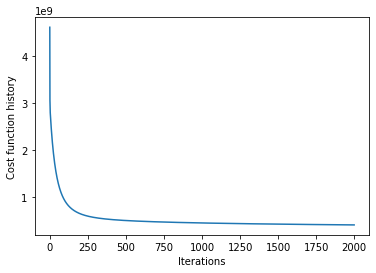

In [281]:
#We will also plot the value of the cost function after each iteration, to see the value reach a minimum and converge to a
#stabalised value
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(2000), J_history)

In [282]:
#We need to now test our values against our dataset
X0test = np.ones(len(xtest)).reshape(225, 1)
Xtest = np.append(X0test, xtest, axis=1).reshape(225, 80)
Xtest = np.append(Xtest, (xtest**2), axis=1).reshape(225, 159)
Xtest = np.append(Xtest, (xtest**3), axis=1).reshape(225, 238)
Xtest = np.append(Xtest, (xtest**4), axis=1).reshape(225, 317)
Xtest = np.append(Xtest, (xtest**5), axis=1).reshape(225, 396)
Xtest = np.append(Xtest, (xtest**6), axis=1).reshape(225, 475)
for i in range(475): Xtest[:, i] /= np.max(Xtest, axis=0)[i]
prediction = Xtest @ theta
std_deviation = np.std((ytest-prediction), axis=0)
print('The standard deviation of the values is:', std_deviation)

The standard deviation of the values is: [47860.32439748]
